<a href="https://colab.research.google.com/github/sharwari-pathak/Statistical-Analysis/blob/main/13_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt     #visualisation
import seaborn as sns               #adv visualisation also plotly library is there
import statsmodels.formula.api as smf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/MyDrive/Python_spring24/Dataset/statecrime.csv"

In [ ]:
df = pd.read_csv(path)           #to read in pandas

In [ ]:
df.head()

,state,violent,murder,hs_grad,poverty,single,white,urban
0,Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
1,Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
2,Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
3,Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
4,California,473.4,5.4,80.6,14.2,27.8,62.7,89.73


In [ ]:
df.tail()

,state,violent,murder,hs_grad,poverty,single,white,urban
46,Virginia,230.0,4.7,86.6,10.5,24.0,70.4,69.79
47,Washington,338.3,2.8,89.7,12.3,22.2,80.2,74.97
48,West Virginia,331.2,4.9,82.8,17.7,23.3,94.3,33.20
49,Wisconsin,259.7,2.6,89.8,12.4,22.2,88.4,55.80
50,Wyoming,219.3,2.0,91.8,9.8,18.9,91.3,24.51


In [ ]:
df.sample(5)

,state,violent,murder,hs_grad,poverty,single,white,urban
10,Georgia,432.6,6.0,83.9,16.5,29.3,61.9,65.38
32,New York,385.5,4.0,84.7,14.2,30.2,67.4,82.66
21,Massachusetts,465.6,2.7,89.0,10.3,25.0,82.4,90.30
45,Vermont,135.1,1.3,91.0,11.4,21.3,95.8,17.38
19,Maine,119.9,2.0,90.2,12.3,22.0,94.9,26.21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    51 non-null     object 
 1   violent  51 non-null     float64
 2   murder   51 non-null     float64
 3   hs_grad  51 non-null     float64
 4   poverty  51 non-null     float64
 5   single   51 non-null     float64
 6   white    51 non-null     float64
 7   urban    51 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [ ]:
df.describe()

,violent,murder,hs_grad,poverty,single,white,urban
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,411.482353,4.900000,86.878431,13.854902,25.186275,77.968627,60.670196
std,208.017447,3.646094,3.377769,3.110583,4.786565,13.553029,20.802432
min,119.900000,0.900000,79.900000,8.500000,17.900000,26.900000,17.380000
25%,263.350000,2.650000,84.050000,11.500000,22.100000,70.600000,46.565000
50%,366.400000,4.700000,87.400000,14.200000,25.500000,80.000000,59.170000
75%,507.400000,6.150000,89.800000,16.400000,27.300000,87.750000,78.415000
max,1348.900000,24.200000,91.800000,21.900000,48.000000,95.800000,100.000000


In [ ]:
df.duplicated().any()

False

In [ ]:
df.isna().any()

state      False
violent    False
murder     False
hs_grad    False
poverty    False
single     False
white      False
urban      False
dtype: bool

In [ ]:
#to drop df.drop.na()

array([[<Axes: title={'center': 'violent'}>,
        <Axes: title={'center': 'murder'}>,
        <Axes: title={'center': 'hs_grad'}>],
       [<Axes: title={'center': 'poverty'}>,
        <Axes: title={'center': 'single'}>,
        <Axes: title={'center': 'white'}>],
       [<Axes: title={'center': 'urban'}>, <Axes: >, <Axes: >]],
      dtype=object)

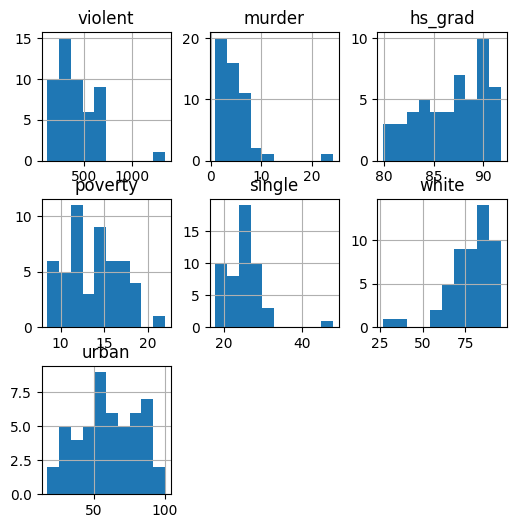

In [ ]:
df.hist(figsize=(6,6))

In [ ]:
df.columns

Index(['state', 'violent', 'murder', 'hs_grad', 'poverty', 'single', 'white',
       'urban'],
      dtype='object')

In [ ]:
df_new = df[['violent', 'murder', 'hs_grad', 'poverty', 'single', 'white','urban']]
df_new.head()

,violent,murder,hs_grad,poverty,single,white,urban
0,459.9,7.1,82.1,17.5,29.0,70.0,48.65
1,632.6,3.2,91.4,9.0,25.5,68.3,44.46
2,423.2,5.5,84.2,16.5,25.7,80.0,80.07
3,530.3,6.3,82.4,18.8,26.3,78.4,39.54
4,473.4,5.4,80.6,14.2,27.8,62.7,89.73


In [ ]:
corr = df.corr(method = 'pearson')
corr      #skip the string column

ValueError: could not convert string to float: 'Alabama'

In [ ]:
corr = df_new.corr(method = 'pearson')       #This is the correlation matrix coorrelation chi method pearson
corr

,violent,murder,hs_grad,poverty,single,white,urban
violent,1.000000,0.868000,-0.383188,0.362683,0.808461,-0.577030,0.427892
murder,0.868000,1.000000,-0.457953,0.541799,0.877239,-0.574495,0.297864
hs_grad,-0.383188,-0.457953,1.000000,-0.742564,-0.561402,0.341508,-0.169358
poverty,0.362683,0.541799,-0.742564,1.000000,0.493288,-0.186937,-0.195094
single,0.808461,0.877239,-0.561402,0.493288,1.000000,-0.751743,0.421086
white,-0.577030,-0.574495,0.341508,-0.186937,-0.751743,1.000000,-0.448929
urban,0.427892,0.297864,-0.169358,-0.195094,0.421086,-0.448929,1.000000


<Axes: >

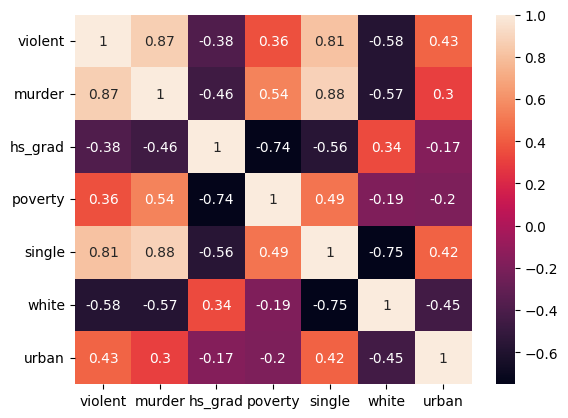

In [ ]:
sns.heatmap(corr,annot = True)

# **Run the Model**

In [ ]:
#hypothesis

model1 = smf.ols(formula = 'murder ~ poverty',data = df_new).fit()      #dependent variable is murder and independent variable is poverty simple linear reg

In [ ]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     20.36
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.03e-05
Time:                        23:26:42   Log-Likelihood:                -128.98
No. Observations:                  51   AIC:                             262.0
Df Residuals:                      49   BIC:                             265.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8989      1.998     -1.952      0.0

In [ ]:
model2 = smf.ols(formula = 'murder ~ poverty+urban',data = df_new).fit()

In [ ]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     20.68
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           3.33e-07
Time:                        23:33:26   Log-Likelihood:                -121.99
No. Observations:                  51   AIC:                             250.0
Df Residuals:                      48   BIC:                             255.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6894      2.305     -4.203      0.0